## Inverse Dynamics of a Planar Two-Link RP Robot Arm

In [2]:
from sympy import *
from sympy.physics.mechanics import LagrangesMethod, dynamicsymbols
import numpy as np
from IPython.display import display, Markdown, Math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def dispmath(lhs, rhs): display(Math(f'{lhs} = {latex(rhs)}'))

![Two-Link RP Robot Arm](two-link_RP_robot_arm.png)

Defining the necessary symbols/functions:

In [7]:
m1, m2, l1, l2, g, t = symbols('m1, m2, l1, l2, g, t')
th1, th2 = dynamicsymbols('theta1, theta2')

Defining the positions of the centers of mass based on the angle and the extension:

In [61]:
x1 = l1*cos(th1); dispmath('x_1', x1)
y1 = l1*sin(th1); dispmath('y_1', y1)
x2 = x1 + l2*cos(th2); dispmath('x_2', x2)
y2 = y1 + l2*sin(th2); dispmath('y_2', y2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Differentiating the positions with respect to time:

In [64]:
x1d = x1.diff(t); dispmath('\\dot{x_1}', x1d)
y1d = y1.diff(t); dispmath('\\dot{y_1}', y1d)
x2d = x2.diff(t); dispmath('\\dot{x_2}', x2d)
y2d = y2.diff(t); dispmath('\\dot{y_2}', y2d)
v1 = (x1d**2 + y1d**2)**(1/2); dispmath('\\dot{v_1}', v1)
v2 = (x2d**2 + y2d**2)**(1/2); dispmath('\\dot{v_2}', v2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Introducing shorthands for derivatives:

In [45]:
thd1 = Derivative(th1, t)
thdd1 = Derivative(thd1, t)
thd2 = Derivative(th2, t)
thdd2 = Derivative(thd2, t)

Computing the kinetic and potential energies:

In [46]:
Ek1 = simplify((m1*(x1d**2 + y1d**2)/2) + (m1*l1**2/12)*thd1**2/2)
Ek2 = simplify((m2*(x2d**2 + y2d**2)/2) + (m2*l2**2/12)*thd2**2/2)

Ep1 = m1*g*y1
Ep2 = m2*g*y2

dispmath('E_{k1}', Ek1)
dispmath('E_{k2}', Ek2)
dispmath('E_{p1}', Ep1)
dispmath('E_{p2}', Ep2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The Lagrangian function:

In [47]:
L = simplify(Ek1 + Ek2 - Ep1 - Ep2)
dispmath('L', L)

<IPython.core.display.Math object>

Forming Lagrange's equations of motion:

In [48]:
LM = LagrangesMethod(L, (th1, th2))
eqns = LM.form_lagranges_equations()
dispmath('\\begin{bmatrix} T \\\\ F \\end{bmatrix}', eqns)

<IPython.core.display.Math object>

Turning the equations of motion into functions that take numerical values:

In [49]:
params = [m1, m2, l1, l2, g, th1, thd1, thdd1, th2, thd2, thdd2]
T_lambda = utilities.lambdify(params, eqns[0])
F_lambda = utilities.lambdify(params, eqns[1])

Introducing numerical values:

In [50]:
M1 = 1.4
M2 = 1.1
L1 = 0.9
L2 = 0.8
G = 9.81

Plotting the general shape of the trajectory:

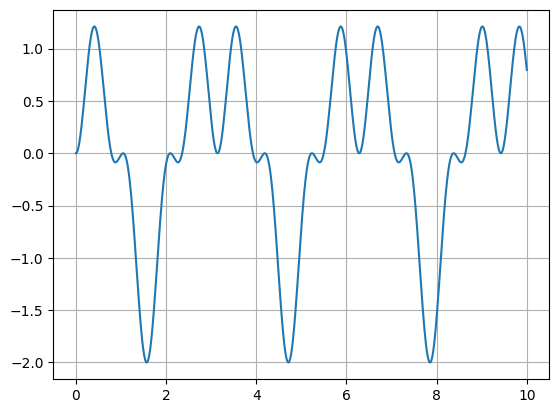

In [51]:
dx = 0.01
xs = np.arange(0, 10 + dx, dx)
ys = np.sin(3*xs) * np.cos(2*xs) * 2 * np.sin(3*xs)
plt.plot(xs, ys)
plt.grid()

Fitting the assumed trajectory into a rectangle within the work area:

In [52]:
th_n = np.pi / 6
x_min = L1 * np.cos(th_n)
y_min = L1 * np.sin(th_n)
x_max = x_min + L2 * np.cos(th_n)
y_max = y_min + L2 * np.sin(th_n)

In [53]:
def fit(x, x_min, x_max):
    fitted = (x - np.min(x)) * (x_max - x_min) / (np.max(x) - np.min(x)) + x_min
    return fitted

(-0.1, 2.0)

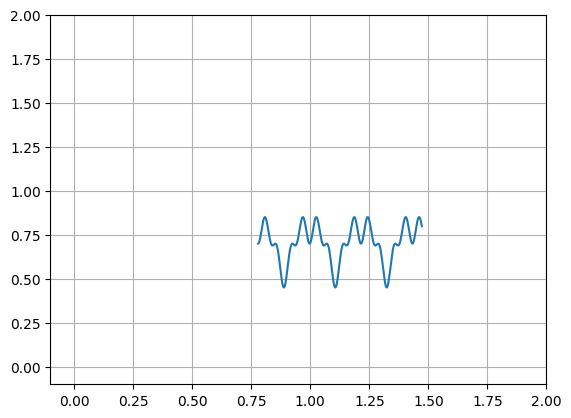

In [54]:
x_traj = fit(xs, x_min, x_max)
y_traj = fit(ys, y_min, y_max)
plt.plot(x_traj, y_traj)
plt.grid()
plt.xlim([-0.1, 2])
plt.ylim([-0.1, 2])

Conversion from the trajectory points to the joint variables:

In [55]:
TH = np.arctan(y_traj / x_traj)
LA = np.sqrt(x_traj**2 + y_traj**2) - L2/2

In [56]:
def interpolate(array, num_elements):
    old_indices = np.arange(len(array))
    new_indices = np.linspace(0, len(array) - 1, num_elements)
    array_interpolated = np.interp(new_indices, old_indices, array)
    return array_interpolated

Numerical differentiation:

In [57]:
ts = np.linspace(0, 10, len(TH))
dt = ts[1] - ts[0]

THd = np.diff(TH) / dt
THd = interpolate(THd, len(TH))
THdd = np.diff(THd) / dt
THdd = interpolate(THdd, len(TH))

LAd = np.diff(LA) / dt
LAd = interpolate(LAd, len(LA))
LAdd = np.diff(LAd) / dt
LAdd = interpolate(LAdd, len(LA))

Calculating the required torque and force:

In [58]:
T_req = T_lambda(M1, M2, L1, L2, G, TH, THd, THdd, LA, LAd, LAdd)
F_req = F_lambda(M1, M2, L1, L2, G, TH, THd, THdd, LA, LAd, LAdd)

Plotting the torque:

Text(0, 0.5, 'T [$N \\cdot m$]')

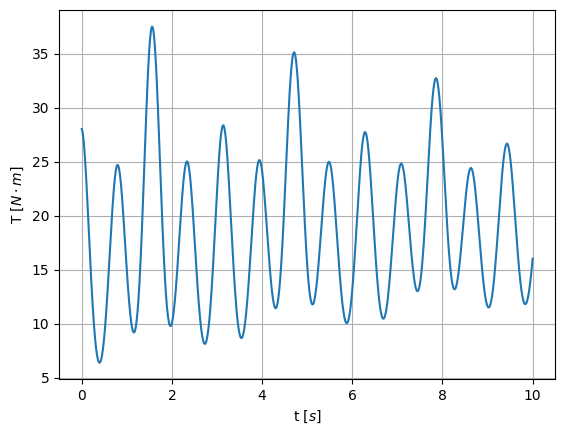

In [59]:
plt.plot(ts, T_req)
plt.grid()
plt.xlabel('t [$s$]')
plt.ylabel('T [$N \cdot m$]')

Plotting the force:

Text(0, 0.5, 'F [$N$]')

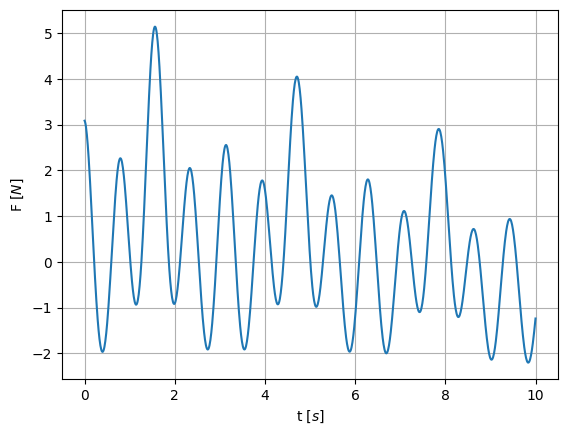

In [60]:
plt.plot(ts, F_req)
plt.grid()
plt.xlabel('t [$s$]')
plt.ylabel('F [$N$]')